Epoch 1/50, Loss: 3.4881, Accuracy: 0.0999, Val Loss: 3.3863, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 2/50, Loss: 3.3723, Accuracy: 0.1000, Val Loss: 3.3605, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 3/50, Loss: 3.3450, Accuracy: 0.1000, Val Loss: 3.3280, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 4/50, Loss: 3.3128, Accuracy: 0.1000, Val Loss: 3.2963, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 5/50, Loss: 3.2817, Accuracy: 0.1000, Val Loss: 3.2656, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 6/50, Loss: 3.2514, Accuracy: 0.1000, Val Loss: 3.2359, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 7/50, Loss: 3.2222, Accuracy: 0.1000, Val Loss: 3.2071, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 8/50, Loss: 3.1938, Accuracy: 0.1000, Val Loss: 3.1791, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 9/50, Loss: 3.1663, Accuracy: 0.1000, Val Loss: 3.1521, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 10/50, Loss: 3.1397, Accuracy: 0.1000, V

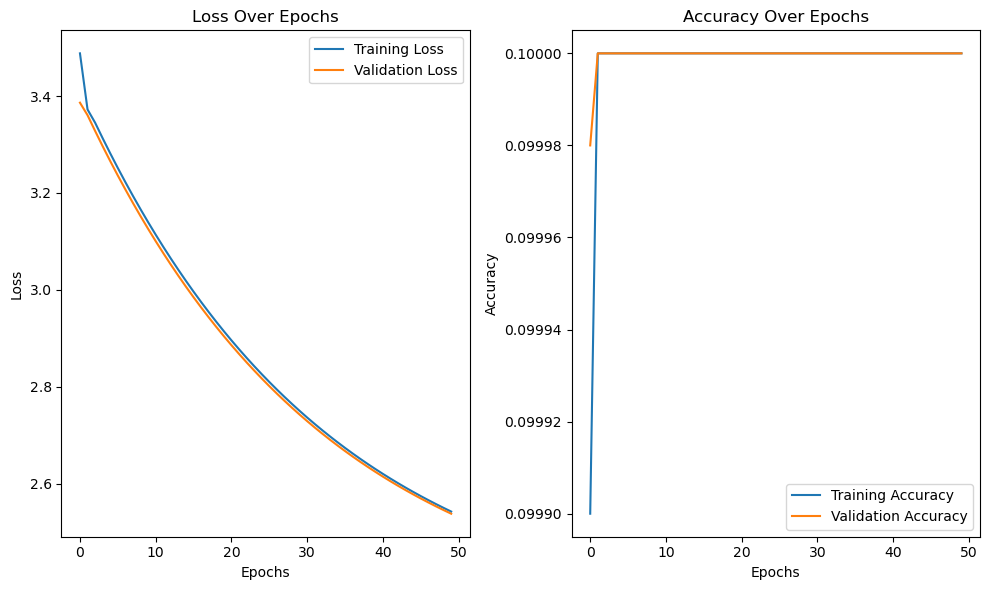

In [3]:
from task_1.core_NN_implementation.fullyConnetedNN import fullyConnectedNN
from task_1.core_NN_implementation.datasetHelper import load_preprocess_cifar10
from task_1.Optimiser.optimiser import SGD, SGDWithMomentum

data_dir = "../dataset/cifar-10-batches-py/"
optimiser = SGDWithMomentum(learning_rate=0.001, momentum=0.9)
#optimiser = SGD(learning_rate=0.001)

# Load and preprocess cifar 10 dataset
X_train, y_train, X_test, y_test = load_preprocess_cifar10(data_dir)

#parameters for the neural network
hidden_layers = [512, 256]
activations = ['relu', 'relu', 'softmax']
learning_rate = 0.001
dropout_rate = 0.5
regularization = 'L2'

#making the neural network
model = fullyConnectedNN(
    input_size=3072,
    output_size=10,
    hidden_layers=hidden_layers,
    activations=activations,
    learning_rate=learning_rate,
    dropout_rate=dropout_rate,
    regularization=regularization,
    optimiser = optimiser
)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#Train the Model
history = model.train(
    X_train_flat, y_train,
    epochs=50,
    batch_size=64,
    X_val=X_test_flat, y_val=y_test
)

#Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#Plot Training and Validation Metrics
model.plot_metrics(history)



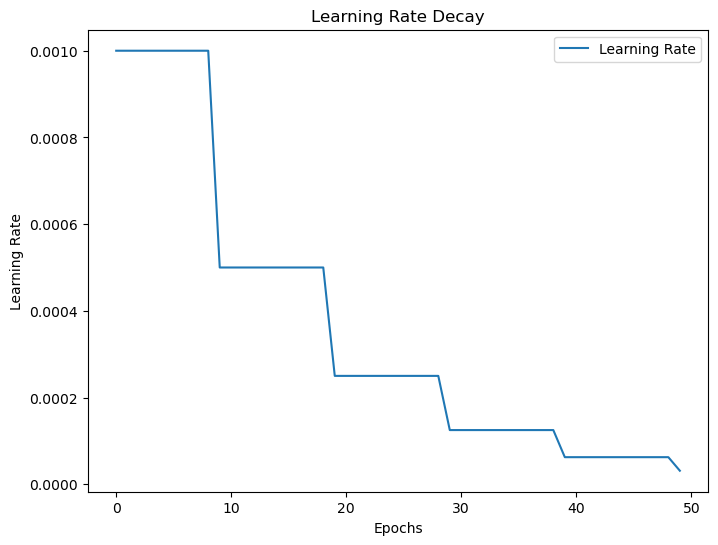

In [4]:
#Plot learing rate
model.plot_learning_rate(history['learning_rate'])


Epoch 1/50, Loss: 4.0837, Accuracy: 0.0998, Val Loss: 3.7831, Val Accuracy: 0.0999, Learning Rate: 0.0010
Epoch 2/50, Loss: 3.7739, Accuracy: 0.1000, Val Loss: 3.7582, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 3/50, Loss: 3.7364, Accuracy: 0.1000, Val Loss: 3.7132, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 4/50, Loss: 3.6922, Accuracy: 0.1000, Val Loss: 3.6697, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 5/50, Loss: 3.6492, Accuracy: 0.1000, Val Loss: 3.6274, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 6/50, Loss: 3.6077, Accuracy: 0.1000, Val Loss: 3.5865, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 7/50, Loss: 3.5674, Accuracy: 0.1000, Val Loss: 3.5468, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 8/50, Loss: 3.5283, Accuracy: 0.1000, Val Loss: 3.5084, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 9/50, Loss: 3.4905, Accuracy: 0.1000, Val Loss: 3.4711, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 10/50, Loss: 3.4538, Accuracy: 0.1000, V

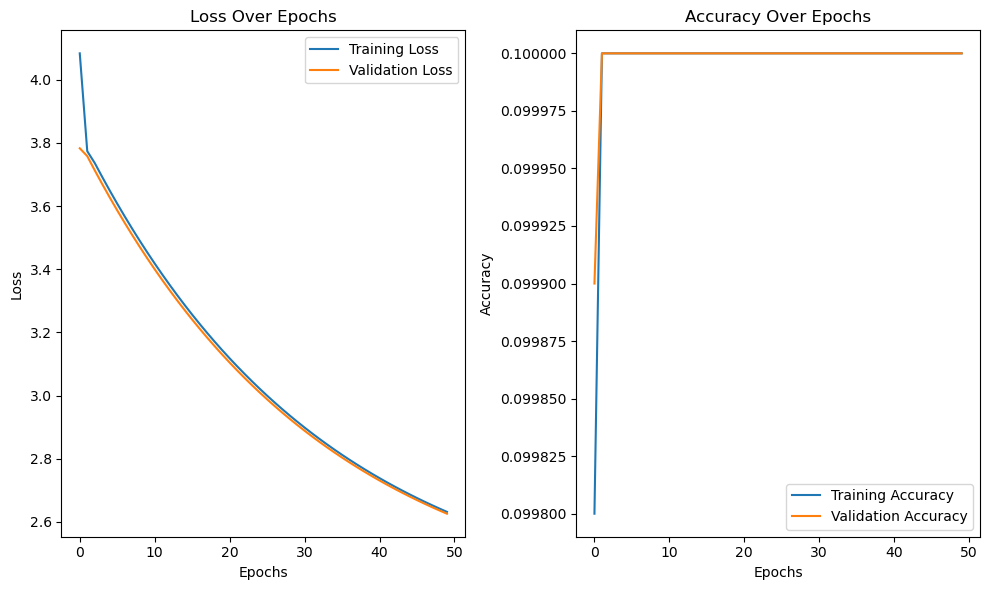

In [5]:
#parameters for the neural network with increase dropout
hidden_layers = [512, 256]
activations = ['relu', 'relu', 'softmax']
learning_rate = 0.001
dropout_rate = 0.8
regularization = 'L2'

#making the neural network
model = fullyConnectedNN(
    input_size=3072,
    output_size=10,
    hidden_layers=hidden_layers,
    activations=activations,
    learning_rate=learning_rate,
    dropout_rate=dropout_rate,
    regularization=regularization,
    optimiser = optimiser
)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#Train the Model
history = model.train(
    X_train_flat, y_train,
    epochs=50,
    batch_size=64,
    X_val=X_test_flat, y_val=y_test
)

#Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#Plot Training and Validation Metrics
model.plot_metrics(history)

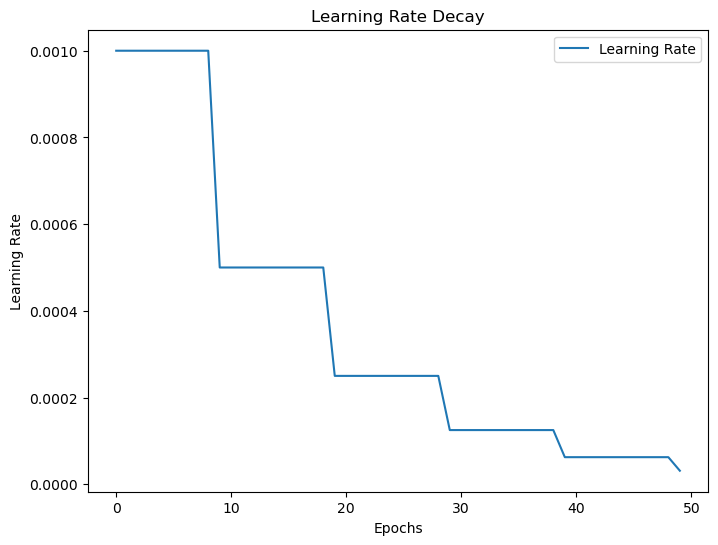

In [6]:
#Plot learing rate
model.plot_learning_rate(history['learning_rate'])

Epoch 1/50, Loss: 3.3308, Accuracy: 0.1000, Val Loss: 3.2992, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 2/50, Loss: 3.2845, Accuracy: 0.1000, Val Loss: 3.2684, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 3/50, Loss: 3.2542, Accuracy: 0.1000, Val Loss: 3.2386, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 4/50, Loss: 3.2248, Accuracy: 0.1000, Val Loss: 3.2097, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 5/50, Loss: 3.1964, Accuracy: 0.1000, Val Loss: 3.1817, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 6/50, Loss: 3.1688, Accuracy: 0.1000, Val Loss: 3.1545, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 7/50, Loss: 3.1421, Accuracy: 0.1000, Val Loss: 3.1282, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 8/50, Loss: 3.1162, Accuracy: 0.1000, Val Loss: 3.1027, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 9/50, Loss: 3.0911, Accuracy: 0.1000, Val Loss: 3.0780, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 10/50, Loss: 3.0668, Accuracy: 0.1000, V

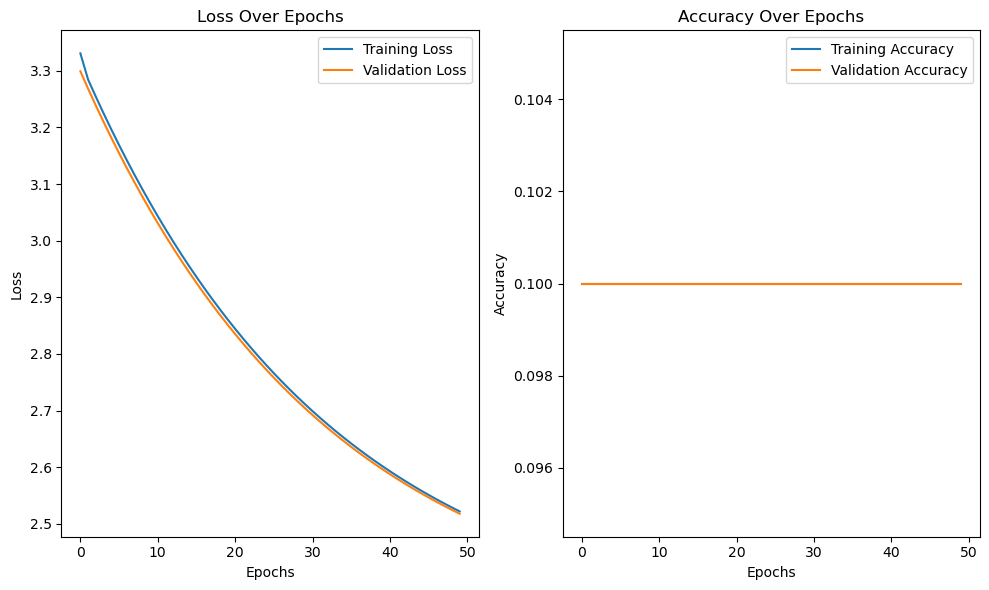

In [7]:
#parameters for the neural network with decrease dropout
hidden_layers = [512, 256]
activations = ['relu', 'relu', 'softmax']
learning_rate = 0.001
dropout_rate = 0.2
regularization = 'L2'

#making the neural network
model = fullyConnectedNN(
    input_size=3072,
    output_size=10,
    hidden_layers=hidden_layers,
    activations=activations,
    learning_rate=learning_rate,
    dropout_rate=dropout_rate,
    regularization=regularization,
    optimiser = optimiser
)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#Train the Model
history = model.train(
    X_train_flat, y_train,
    epochs=50,
    batch_size=64,
    X_val=X_test_flat, y_val=y_test
)

#Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#Plot Training and Validation Metrics
model.plot_metrics(history)

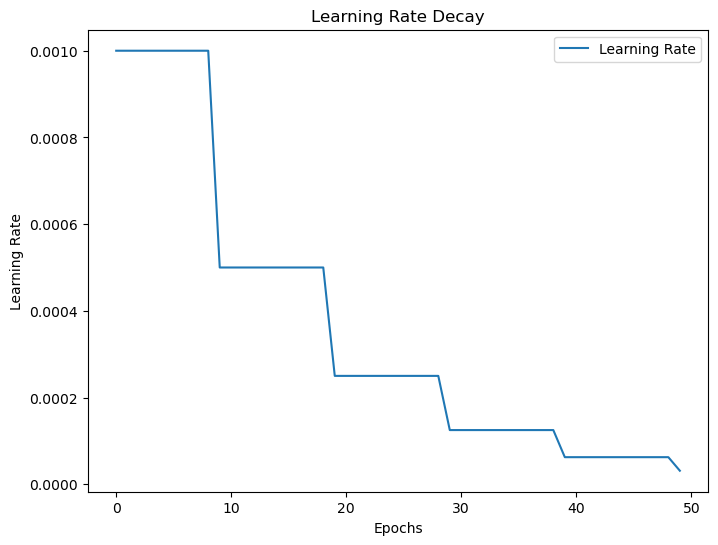

In [8]:
#Plot learing rate
model.plot_learning_rate(history['learning_rate'])

Epoch 1/50, Loss: 3.4500, Accuracy: 0.1000, Val Loss: 3.3774, Val Accuracy: 0.1000, Learning Rate: 0.0100
Epoch 2/50, Loss: 3.3621, Accuracy: 0.1000, Val Loss: 3.3513, Val Accuracy: 0.1000, Learning Rate: 0.0100
Epoch 3/50, Loss: 3.3360, Accuracy: 0.1000, Val Loss: 3.3191, Val Accuracy: 0.1000, Learning Rate: 0.0100
Epoch 4/50, Loss: 3.3041, Accuracy: 0.1000, Val Loss: 3.2877, Val Accuracy: 0.1000, Learning Rate: 0.0100
Epoch 5/50, Loss: 3.2732, Accuracy: 0.1000, Val Loss: 3.2573, Val Accuracy: 0.1000, Learning Rate: 0.0100
Epoch 6/50, Loss: 3.2433, Accuracy: 0.1000, Val Loss: 3.2278, Val Accuracy: 0.1000, Learning Rate: 0.0100
Epoch 7/50, Loss: 3.2143, Accuracy: 0.1000, Val Loss: 3.1993, Val Accuracy: 0.1000, Learning Rate: 0.0100
Epoch 8/50, Loss: 3.1861, Accuracy: 0.1000, Val Loss: 3.1716, Val Accuracy: 0.1000, Learning Rate: 0.0100
Epoch 9/50, Loss: 3.1589, Accuracy: 0.1000, Val Loss: 3.1448, Val Accuracy: 0.1000, Learning Rate: 0.0100
Epoch 10/50, Loss: 3.1325, Accuracy: 0.1000, V

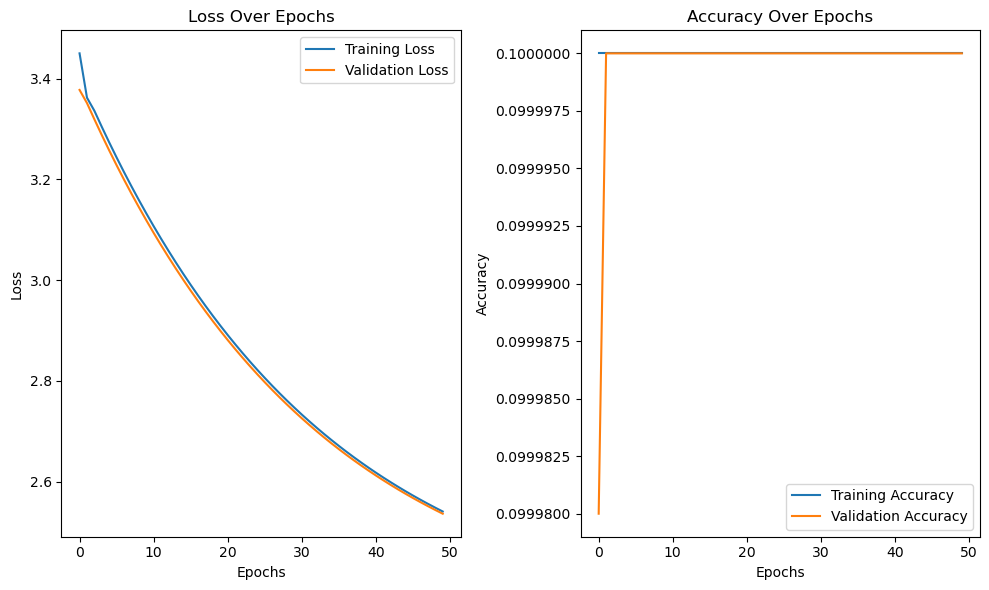

In [9]:
#parameters for the neural network with increased learning rate
hidden_layers = [512, 256]
activations = ['relu', 'relu', 'softmax']
learning_rate = 0.01
dropout_rate = 0.5
regularization = 'L2'

#making the neural network
model = fullyConnectedNN(
    input_size=3072,
    output_size=10,
    hidden_layers=hidden_layers,
    activations=activations,
    learning_rate=learning_rate,
    dropout_rate=dropout_rate,
    regularization=regularization,
    optimiser = optimiser
)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#Train the Model
history = model.train(
    X_train_flat, y_train,
    epochs=50,
    batch_size=64,
    X_val=X_test_flat, y_val=y_test
)

#Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#Plot Training and Validation Metrics
model.plot_metrics(history)

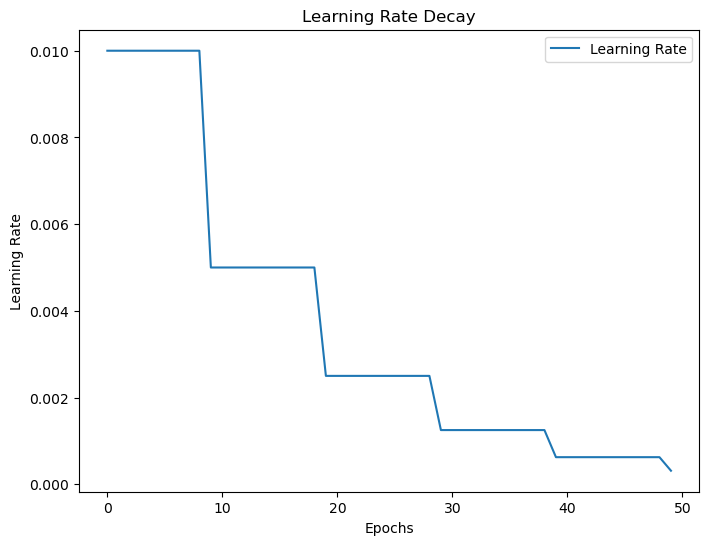

In [10]:
#Plot learing rate
model.plot_learning_rate(history['learning_rate'])

Epoch 1/50, Loss: 3.4573, Accuracy: 0.1001, Val Loss: 3.3883, Val Accuracy: 0.1000, Learning Rate: 0.0001
Epoch 2/50, Loss: 3.3606, Accuracy: 0.1000, Val Loss: 3.3428, Val Accuracy: 0.1000, Learning Rate: 0.0001
Epoch 3/50, Loss: 3.3274, Accuracy: 0.1000, Val Loss: 3.3107, Val Accuracy: 0.1000, Learning Rate: 0.0001
Epoch 4/50, Loss: 3.2958, Accuracy: 0.1000, Val Loss: 3.2796, Val Accuracy: 0.1000, Learning Rate: 0.0001
Epoch 5/50, Loss: 3.2652, Accuracy: 0.1000, Val Loss: 3.2494, Val Accuracy: 0.1000, Learning Rate: 0.0001
Epoch 6/50, Loss: 3.2355, Accuracy: 0.1000, Val Loss: 3.2201, Val Accuracy: 0.1000, Learning Rate: 0.0001
Epoch 7/50, Loss: 3.2067, Accuracy: 0.1000, Val Loss: 3.1918, Val Accuracy: 0.1000, Learning Rate: 0.0001
Epoch 8/50, Loss: 3.1788, Accuracy: 0.1000, Val Loss: 3.1644, Val Accuracy: 0.1000, Learning Rate: 0.0001
Epoch 9/50, Loss: 3.1518, Accuracy: 0.1000, Val Loss: 3.1378, Val Accuracy: 0.1000, Learning Rate: 0.0001
Epoch 10/50, Loss: 3.1256, Accuracy: 0.1000, V

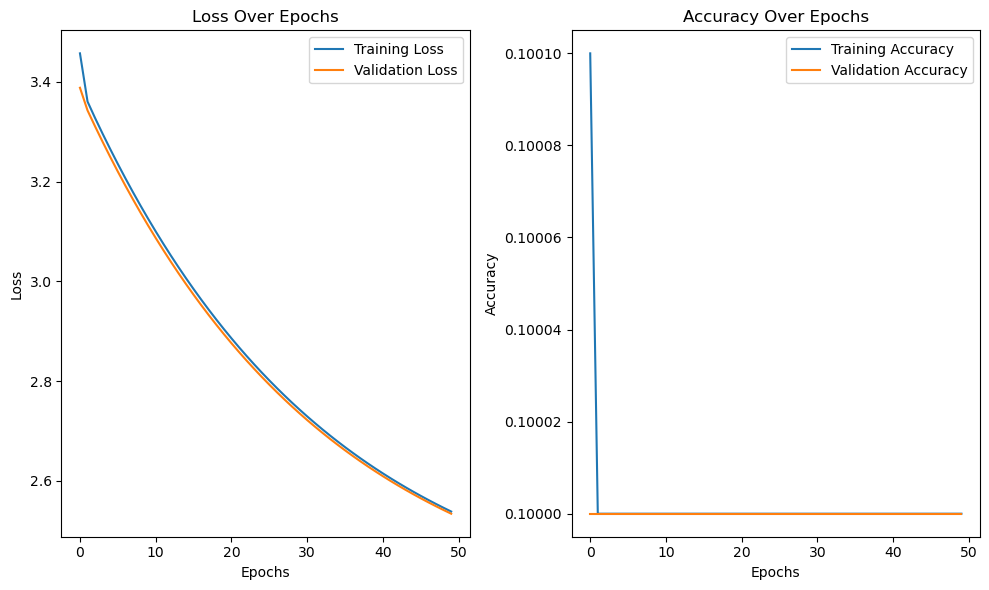

In [11]:
#parameters for the neural network with decreased learning rate
hidden_layers = [512, 256]
activations = ['relu', 'relu', 'softmax']
learning_rate = 0.0001
dropout_rate = 0.5
regularization = 'L2'

#making the neural network
model = fullyConnectedNN(
    input_size=3072,
    output_size=10,
    hidden_layers=hidden_layers,
    activations=activations,
    learning_rate=learning_rate,
    dropout_rate=dropout_rate,
    regularization=regularization,
    optimiser = optimiser
)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#Train the Model
history = model.train(
    X_train_flat, y_train,
    epochs=50,
    batch_size=64,
    X_val=X_test_flat, y_val=y_test
)

#Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#Plot Training and Validation Metrics
model.plot_metrics(history)

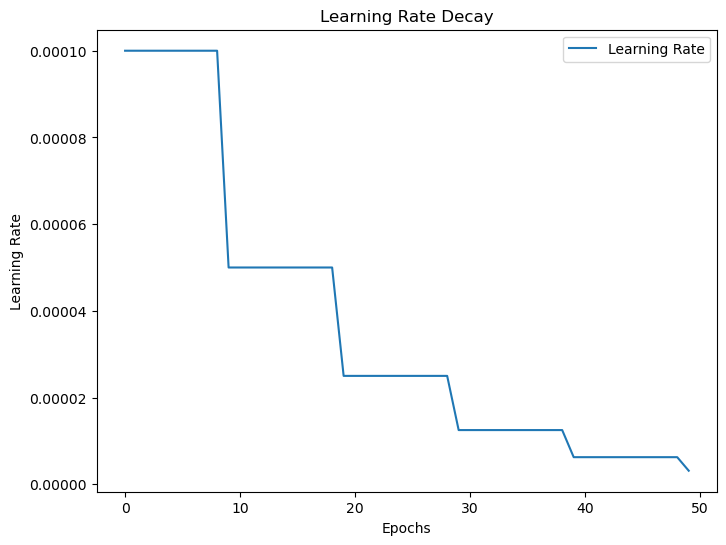

In [12]:
#Plot learing rate
model.plot_learning_rate(history['learning_rate'])

Epoch 1/50, Loss: 4.2147, Accuracy: 0.1011, Val Loss: 3.1197, Val Accuracy: 0.1016, Learning Rate: 0.0010
Epoch 2/50, Loss: 2.9645, Accuracy: 0.1253, Val Loss: 2.6369, Val Accuracy: 0.1187, Learning Rate: 0.0010
Epoch 3/50, Loss: 3.8320, Accuracy: 0.1410, Val Loss: 4.2068, Val Accuracy: 0.1365, Learning Rate: 0.0010
Epoch 4/50, Loss: 5.0178, Accuracy: 0.1140, Val Loss: 4.3444, Val Accuracy: 0.1110, Learning Rate: 0.0010
Epoch 5/50, Loss: 4.9669, Accuracy: 0.1104, Val Loss: 4.2950, Val Accuracy: 0.1079, Learning Rate: 0.0010
Epoch 6/50, Loss: 4.4773, Accuracy: 0.1379, Val Loss: 4.1726, Val Accuracy: 0.1392, Learning Rate: 0.0010
Epoch 7/50, Loss: 4.3454, Accuracy: 0.1081, Val Loss: 3.5934, Val Accuracy: 0.1095, Learning Rate: 0.0010
Epoch 8/50, Loss: 3.7185, Accuracy: 0.1329, Val Loss: 2.9136, Val Accuracy: 0.1324, Learning Rate: 0.0010
Epoch 9/50, Loss: 3.1324, Accuracy: 0.1044, Val Loss: 2.5685, Val Accuracy: 0.1032, Learning Rate: 0.0010
Epoch 10/50, Loss: 2.5286, Accuracy: 0.1000, V

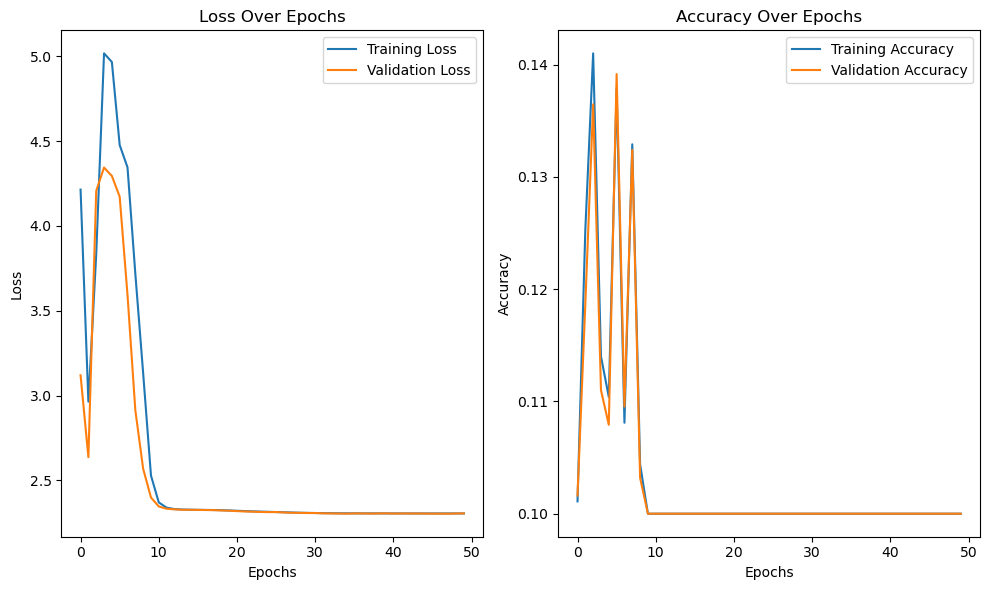

In [13]:
#parameters for the neural network with L1 regularization
hidden_layers = [512, 256]
activations = ['relu', 'relu', 'softmax']
learning_rate = 0.001
dropout_rate = 0.5
regularization = 'L1'

#making the neural network
model = fullyConnectedNN(
    input_size=3072,
    output_size=10,
    hidden_layers=hidden_layers,
    activations=activations,
    learning_rate=learning_rate,
    dropout_rate=dropout_rate,
    regularization=regularization,
    optimiser = optimiser
)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#Train the Model
history = model.train(
    X_train_flat, y_train,
    epochs=50,
    batch_size=64,
    X_val=X_test_flat, y_val=y_test
)

#Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#Plot Training and Validation Metrics
model.plot_metrics(history)

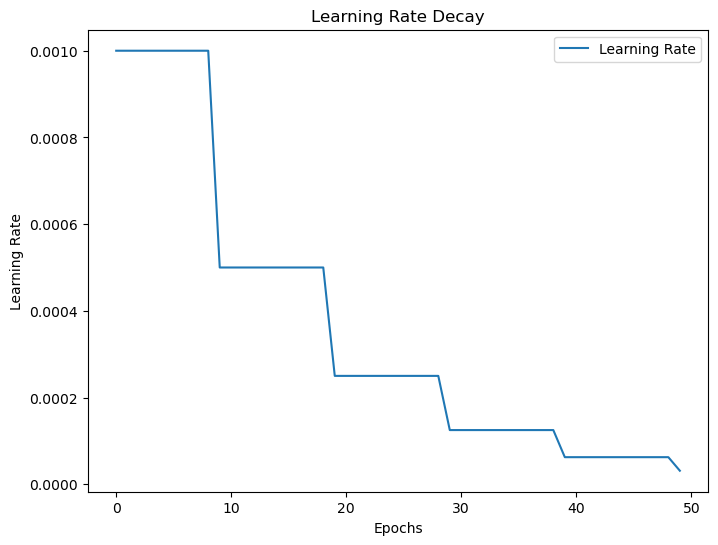

In [14]:
#Plot learing rate
model.plot_learning_rate(history['learning_rate'])

Epoch 1/50, Loss: 3.3861, Accuracy: 0.1000, Val Loss: 3.2835, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 2/50, Loss: 3.2546, Accuracy: 0.1000, Val Loss: 3.2240, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 3/50, Loss: 3.1969, Accuracy: 0.1000, Val Loss: 3.1681, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 4/50, Loss: 3.1427, Accuracy: 0.1000, Val Loss: 3.1157, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 5/50, Loss: 3.0919, Accuracy: 0.1000, Val Loss: 3.0664, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 6/50, Loss: 3.0441, Accuracy: 0.1000, Val Loss: 3.0201, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 7/50, Loss: 2.9992, Accuracy: 0.1000, Val Loss: 2.9766, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 8/50, Loss: 2.9571, Accuracy: 0.1000, Val Loss: 2.9358, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 9/50, Loss: 2.9175, Accuracy: 0.1000, Val Loss: 2.8974, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 10/50, Loss: 2.8803, Accuracy: 0.1000, V

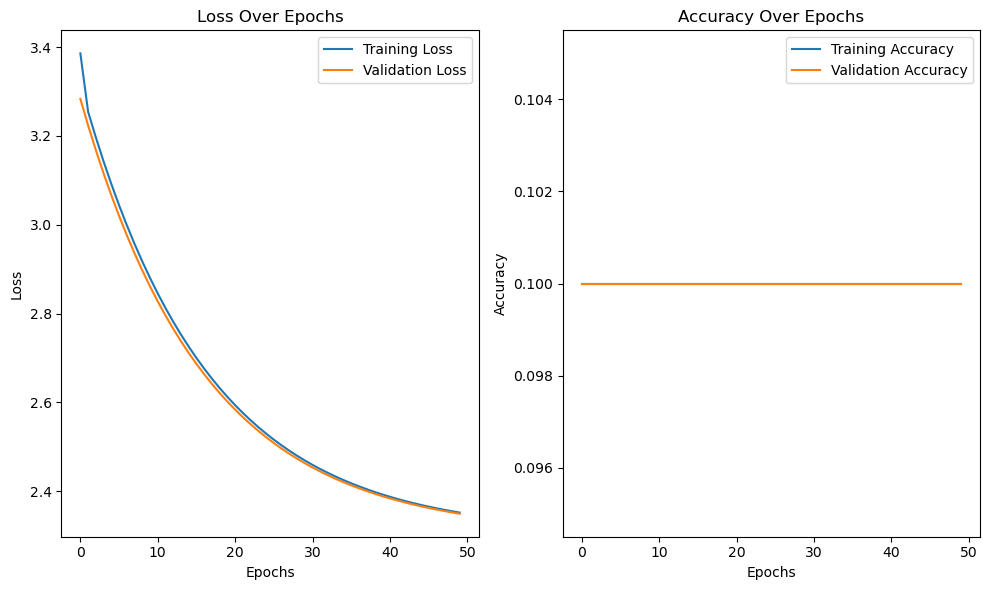

In [15]:
#parameters for the neural network
hidden_layers = [512, 256]
activations = ['relu', 'relu', 'softmax']
learning_rate = 0.001
dropout_rate = 0.5
regularization = 'L2'

#making the neural network
model = fullyConnectedNN(
    input_size=3072,
    output_size=10,
    hidden_layers=hidden_layers,
    activations=activations,
    learning_rate=learning_rate,
    dropout_rate=dropout_rate,
    regularization=regularization,
    optimiser = optimiser
)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#Train the Model with  smaller batch size
history = model.train(
    X_train_flat, y_train,
    epochs=50,
    batch_size=32,
    X_val=X_test_flat, y_val=y_test
)

#Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#Plot Training and Validation Metrics
model.plot_metrics(history)

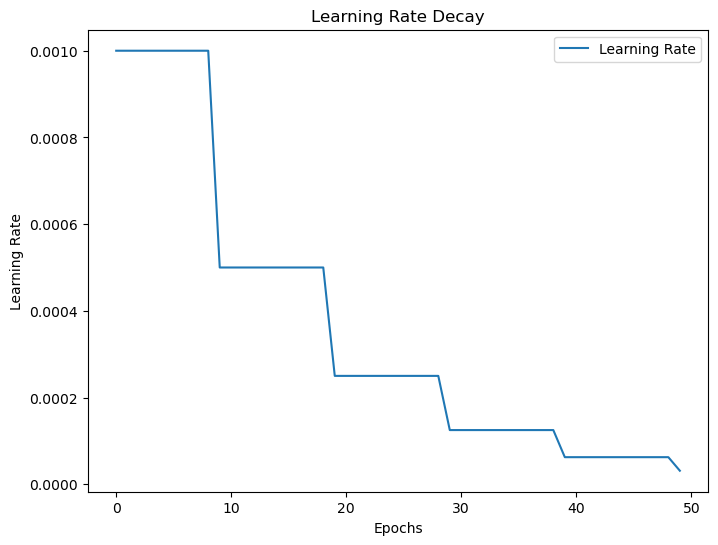

In [16]:
#Plot learing rate
model.plot_learning_rate(history['learning_rate'])

Epoch 1/50, Loss: 3.5448, Accuracy: 0.1000, Val Loss: 3.5072, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 2/50, Loss: 3.5025, Accuracy: 0.1000, Val Loss: 3.5070, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 3/50, Loss: 3.5016, Accuracy: 0.1000, Val Loss: 3.4922, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 4/50, Loss: 3.4833, Accuracy: 0.1000, Val Loss: 3.4736, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 5/50, Loss: 3.4648, Accuracy: 0.1000, Val Loss: 3.4552, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 6/50, Loss: 3.4466, Accuracy: 0.1000, Val Loss: 3.4372, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 7/50, Loss: 3.4287, Accuracy: 0.1000, Val Loss: 3.4194, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 8/50, Loss: 3.4111, Accuracy: 0.1000, Val Loss: 3.4019, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 9/50, Loss: 3.3937, Accuracy: 0.1000, Val Loss: 3.3847, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 10/50, Loss: 3.3767, Accuracy: 0.1000, V

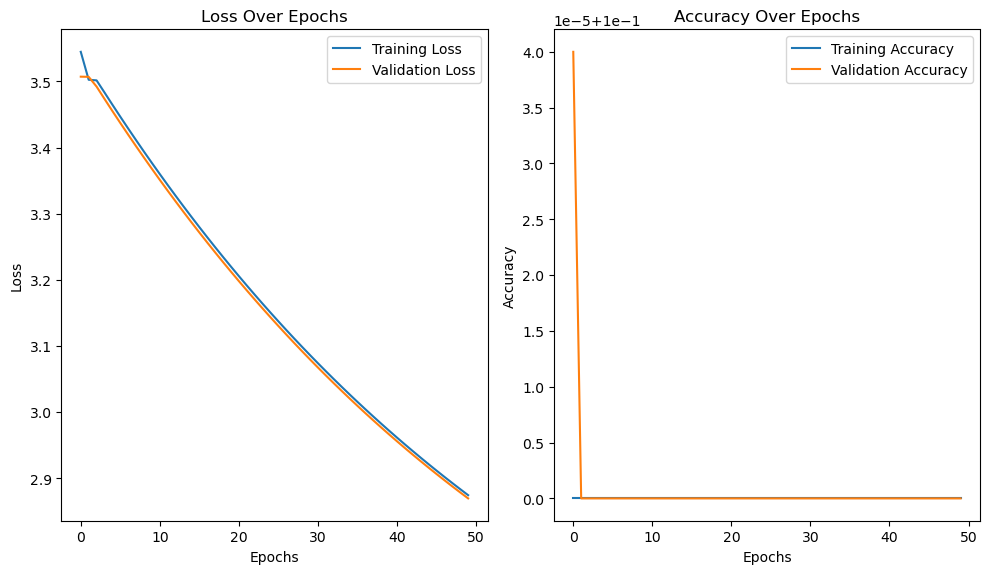

In [17]:
#parameters for the neural network
hidden_layers = [512, 256]
activations = ['relu', 'relu', 'softmax']
learning_rate = 0.001
dropout_rate = 0.5
regularization = 'L2'

#making the neural network
model = fullyConnectedNN(
    input_size=3072,
    output_size=10,
    hidden_layers=hidden_layers,
    activations=activations,
    learning_rate=learning_rate,
    dropout_rate=dropout_rate,
    regularization=regularization,
    optimiser = optimiser
)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#Train the Model with bigger batch size
history = model.train(
    X_train_flat, y_train,
    epochs=50,
    batch_size=128,
    X_val=X_test_flat, y_val=y_test
)

#Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#Plot Training and Validation Metrics
model.plot_metrics(history)

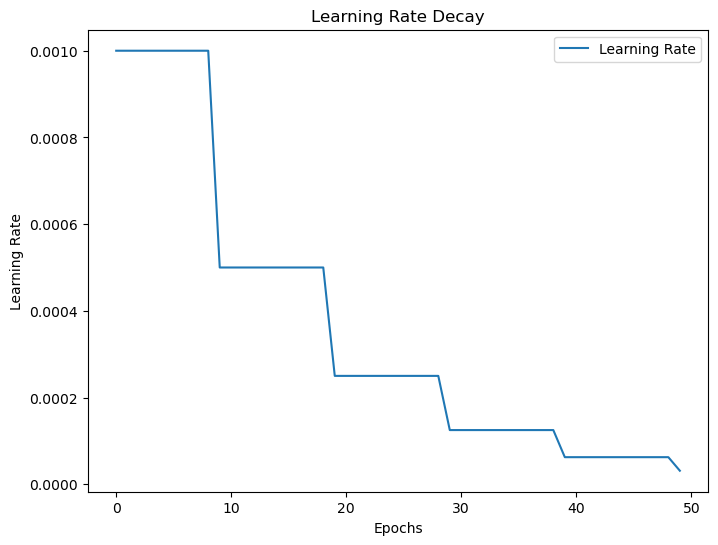

In [18]:
#Plot learing rate
model.plot_learning_rate(history['learning_rate'])

Epoch 1/10, Loss: 3.4634, Accuracy: 0.1000, Val Loss: 3.3760, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 2/10, Loss: 3.3602, Accuracy: 0.1000, Val Loss: 3.3430, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 3/10, Loss: 3.3276, Accuracy: 0.1000, Val Loss: 3.3108, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 4/10, Loss: 3.2960, Accuracy: 0.1000, Val Loss: 3.2797, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 5/10, Loss: 3.2653, Accuracy: 0.1000, Val Loss: 3.2495, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 6/10, Loss: 3.2356, Accuracy: 0.1000, Val Loss: 3.2203, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 7/10, Loss: 3.2068, Accuracy: 0.1000, Val Loss: 3.1919, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 8/10, Loss: 3.1789, Accuracy: 0.1000, Val Loss: 3.1645, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 9/10, Loss: 3.1519, Accuracy: 0.1000, Val Loss: 3.1379, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 10/10, Loss: 3.1257, Accuracy: 0.1000, V

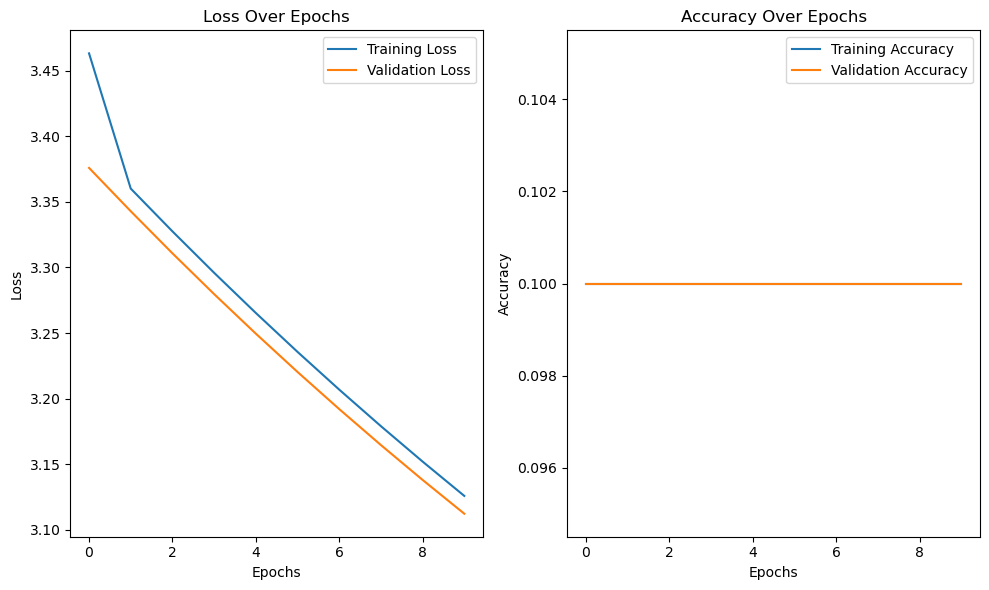

In [19]:
#parameters for the neural network
hidden_layers = [512, 256]
activations = ['relu', 'relu', 'softmax']
learning_rate = 0.001
dropout_rate = 0.5
regularization = 'L2'

#making the neural network
model = fullyConnectedNN(
    input_size=3072,
    output_size=10,
    hidden_layers=hidden_layers,
    activations=activations,
    learning_rate=learning_rate,
    dropout_rate=dropout_rate,
    regularization=regularization,
    optimiser = optimiser
)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#Train the Model with less epochs
history = model.train(
    X_train_flat, y_train,
    epochs=10,
    batch_size=64,
    X_val=X_test_flat, y_val=y_test
)

#Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#Plot Training and Validation Metrics
model.plot_metrics(history)

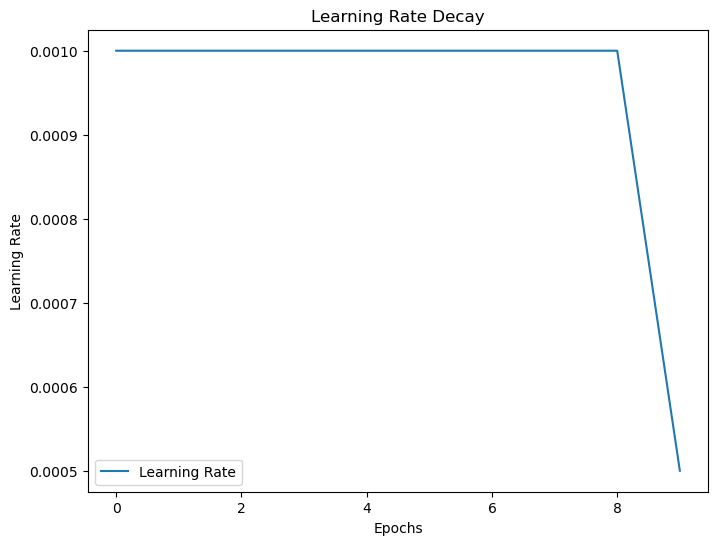

In [20]:
#Plot learing rate
model.plot_learning_rate(history['learning_rate'])

Epoch 1/100, Loss: 3.5094, Accuracy: 0.1000, Val Loss: 3.4191, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 2/100, Loss: 3.4025, Accuracy: 0.1000, Val Loss: 3.3846, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 3/100, Loss: 3.3686, Accuracy: 0.1000, Val Loss: 3.3512, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 4/100, Loss: 3.3357, Accuracy: 0.1000, Val Loss: 3.3188, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 5/100, Loss: 3.3038, Accuracy: 0.1000, Val Loss: 3.2874, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 6/100, Loss: 3.2729, Accuracy: 0.1000, Val Loss: 3.2570, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 7/100, Loss: 3.2429, Accuracy: 0.1000, Val Loss: 3.2275, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 8/100, Loss: 3.2139, Accuracy: 0.1000, Val Loss: 3.1990, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 9/100, Loss: 3.1858, Accuracy: 0.1000, Val Loss: 3.1713, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 10/100, Loss: 3.1586, Accuracy:

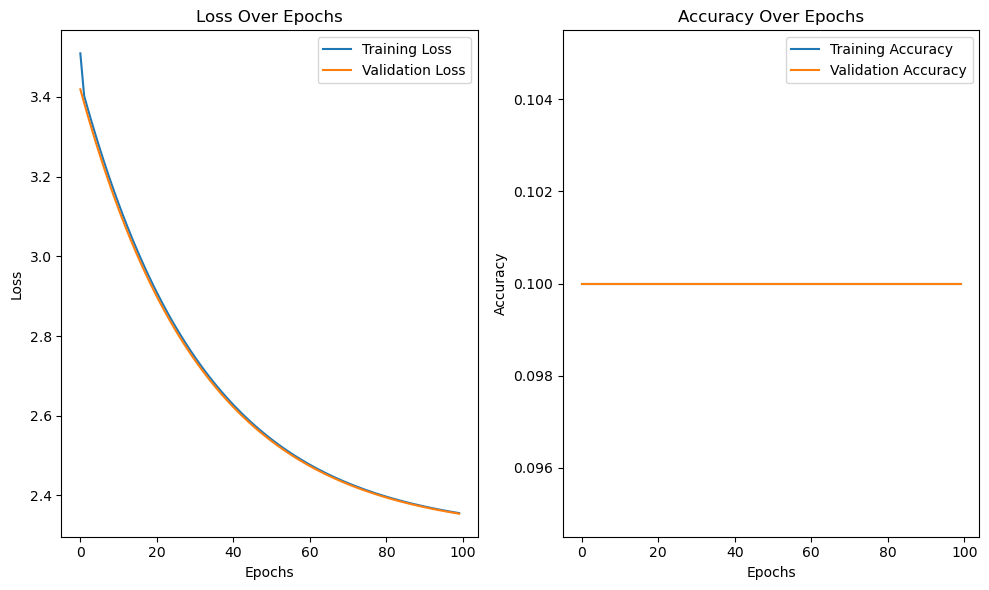

In [21]:
#parameters for the neural network
hidden_layers = [512, 256]
activations = ['relu', 'relu', 'softmax']
learning_rate = 0.001
dropout_rate = 0.5
regularization = 'L2'

#making the neural network
model = fullyConnectedNN(
    input_size=3072,
    output_size=10,
    hidden_layers=hidden_layers,
    activations=activations,
    learning_rate=learning_rate,
    dropout_rate=dropout_rate,
    regularization=regularization,
    optimiser = optimiser
)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#Train the Model with more epochs
history = model.train(
    X_train_flat, y_train,
    epochs=100,
    batch_size=64,
    X_val=X_test_flat, y_val=y_test
)

#Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#Plot Training and Validation Metrics
model.plot_metrics(history)

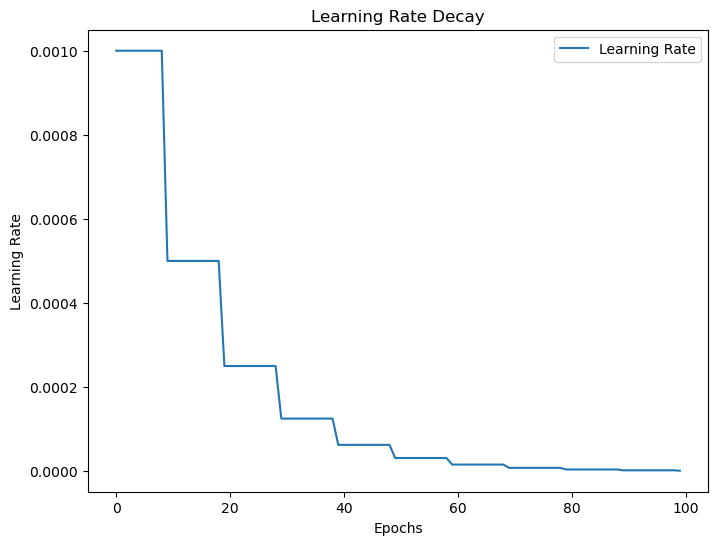

In [22]:
#Plot learing rate
model.plot_learning_rate(history['learning_rate'])

Epoch 1/50, Loss: 3.4829, Accuracy: 0.0999, Val Loss: 3.4041, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 2/50, Loss: 3.3880, Accuracy: 0.1000, Val Loss: 3.3738, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 3/50, Loss: 3.3582, Accuracy: 0.1000, Val Loss: 3.3410, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 4/50, Loss: 3.3256, Accuracy: 0.1000, Val Loss: 3.3089, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 5/50, Loss: 3.2941, Accuracy: 0.1000, Val Loss: 3.2778, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 6/50, Loss: 3.2635, Accuracy: 0.1000, Val Loss: 3.2477, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 7/50, Loss: 3.2338, Accuracy: 0.1000, Val Loss: 3.2185, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 8/50, Loss: 3.2051, Accuracy: 0.1000, Val Loss: 3.1902, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 9/50, Loss: 3.1772, Accuracy: 0.1000, Val Loss: 3.1628, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 10/50, Loss: 3.1503, Accuracy: 0.1000, V

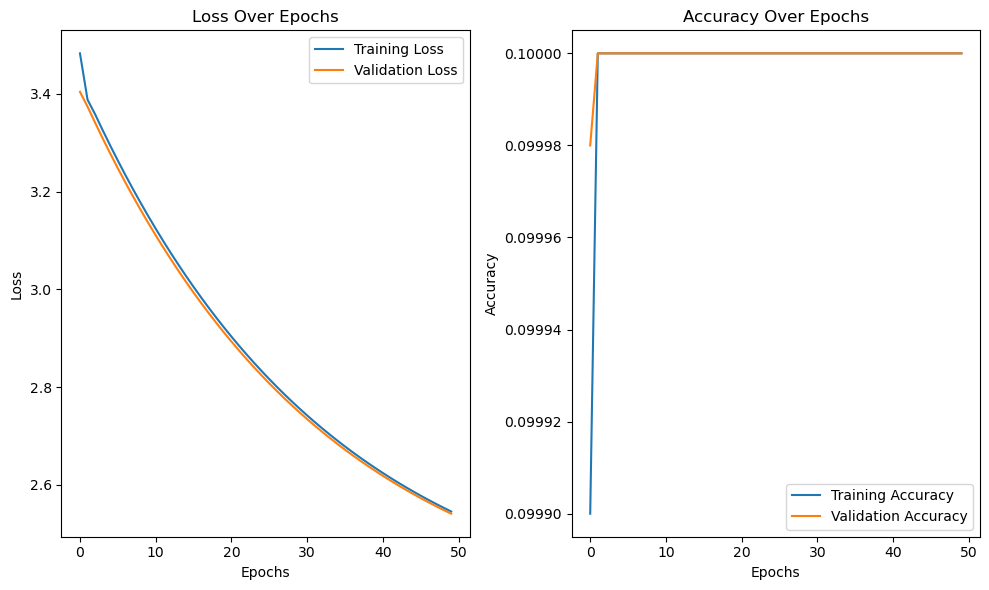

In [23]:
#parameters for the neural network if the activation layer is none
hidden_layers = [512, 256]
activations = None
learning_rate = 0.001
dropout_rate = 0.5
regularization = 'L2'

#making the neural network
model = fullyConnectedNN(
    input_size=3072,
    output_size=10,
    hidden_layers=hidden_layers,
    activations=activations,
    learning_rate=learning_rate,
    dropout_rate=dropout_rate,
    regularization=regularization,
    optimiser = optimiser
)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#Train the Model with more epochs
history = model.train(
    X_train_flat, y_train,
    epochs=50,
    batch_size=64,
    X_val=X_test_flat, y_val=y_test
)

#Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#Plot Training and Validation Metrics
model.plot_metrics(history)

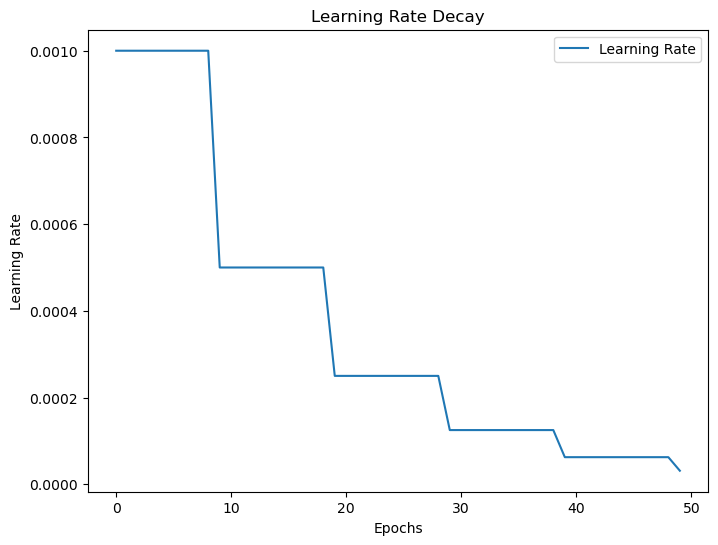

In [24]:
#Plot learing rate
model.plot_learning_rate(history['learning_rate'])

Epoch 1/50, Loss: 3.4541, Accuracy: 0.1000, Val Loss: 3.3816, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 2/50, Loss: 3.3656, Accuracy: 0.1000, Val Loss: 3.3483, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 3/50, Loss: 3.3328, Accuracy: 0.1000, Val Loss: 3.3160, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 4/50, Loss: 3.3010, Accuracy: 0.1000, Val Loss: 3.2847, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 5/50, Loss: 3.2702, Accuracy: 0.1000, Val Loss: 3.2544, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 6/50, Loss: 3.2404, Accuracy: 0.1000, Val Loss: 3.2250, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 7/50, Loss: 3.2114, Accuracy: 0.1000, Val Loss: 3.1965, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 8/50, Loss: 3.1834, Accuracy: 0.1000, Val Loss: 3.1689, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 9/50, Loss: 3.1562, Accuracy: 0.1000, Val Loss: 3.1422, Val Accuracy: 0.1000, Learning Rate: 0.0010
Epoch 10/50, Loss: 3.1299, Accuracy: 0.1000, V

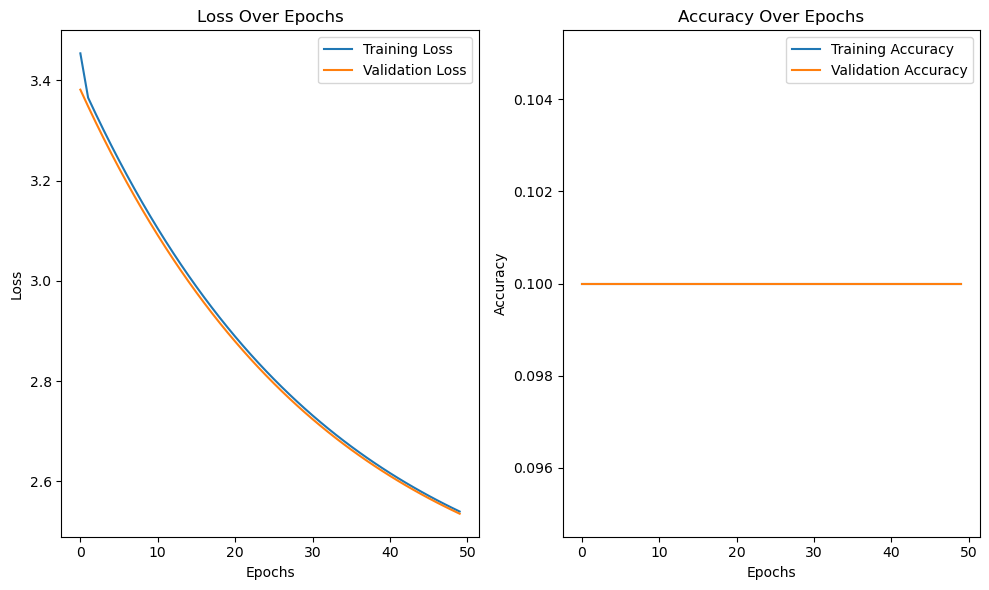

In [25]:
#parameters for the neural network if the activation layer is just relu layer
hidden_layers = [512, 256]
activations = ['relu','relu']
learning_rate = 0.001
dropout_rate = 0.5
regularization = 'L2'

#making the neural network
model = fullyConnectedNN(
    input_size=3072,
    output_size=10,
    hidden_layers=hidden_layers,
    activations=activations,
    learning_rate=learning_rate,
    dropout_rate=dropout_rate,
    regularization=regularization,
    optimiser = optimiser
)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#Train the Model with more epochs
history = model.train(
    X_train_flat, y_train,
    epochs=50,
    batch_size=64,
    X_val=X_test_flat, y_val=y_test
)

#Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

#Plot Training and Validation Metrics
model.plot_metrics(history)

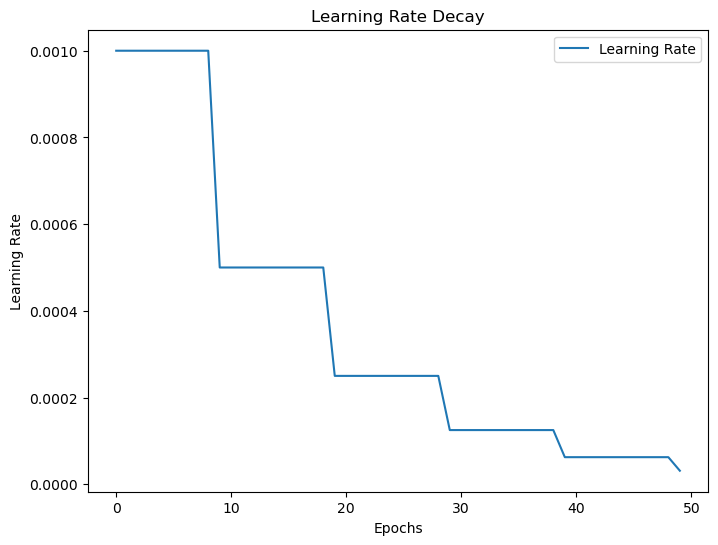

In [26]:
#Plot learing rate
model.plot_learning_rate(history['learning_rate'])